In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Problem 1.
# Consider the daily log return, in percentage, of Coca-Cola stock (KO) from January 3rd, 2007 to January 31st, 2018.

dat = pd.read_csv('p1-data.csv', index_col='Index', parse_dates=True)
dat.head()

,KO
Index,
2007-01-03,14.823176
2007-01-04,14.829278
2007-01-05,14.725530
2007-01-08,14.820124
2007-01-09,14.832333


In [3]:
dat.tail()

,KO
Index,
2018-01-25,47.840000
2018-01-26,48.529999
2018-01-29,47.700001
2018-01-30,47.410000
2018-01-31,47.590000


In [4]:
r = 100 * np.log(dat['KO']).diff()
r.dropna(inplace=True, how='any')
r.size
# Let {r_t} be the percentage daily log returns.

2789

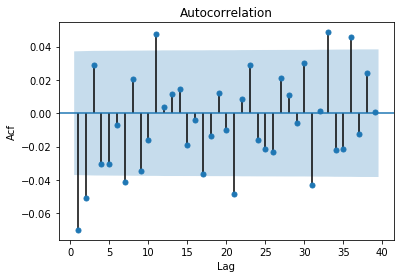

In [5]:
# Problem 1a.
# Are there any autocorrelation in {r_t}? Why?

sm.graphics.tsa.plot_acf(r, lags=range(1,40))
plt.xlabel('Lag')
plt.ylabel('Acf')
plt.show()

In [6]:
res = sm.stats.acorr_ljungbox(r, lags=[10], return_df=True)
df = res.index.values[0]
X_squared, pvalue = res.loc[[df],'lb_stat':'lb_pvalue'].values[0]

In [7]:
result = """
        Box-Ljung test

X-squared = {:.2f},
df = {},
p-value = {:.3e}
""".format(X_squared, df, pvalue)

print(result)


        Box-Ljung test

X-squared = 38.76,
df = 10,
p-value = 2.796e-05



In [8]:
# Problem 1b.
# Fit an ARMA+GARCH model with normal residuals to {r_t}.
# State the fitted model. Is the model adequate? why?


import pmdarima as pm

arima_fit = pm.auto_arima(r, max_p=20, max_q=20, D=2, information_criterion='bic')

In [9]:
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2789
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -4327.324
Date:                Sun, 23 Aug 2020   AIC                           8658.649
Time:                        22:47:24   BIC                           8670.516
Sample:                             0   HQIC                          8662.933
                               - 2789                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0761      0.009     -8.701      0.000      -0.093      -0.059
sigma2         1.3038      0.014     92.940      0.000       1.276       1.331
===================================================================================
Ljung-Box (Q):                       76.26   Jarque-Bera (JB):             16727.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

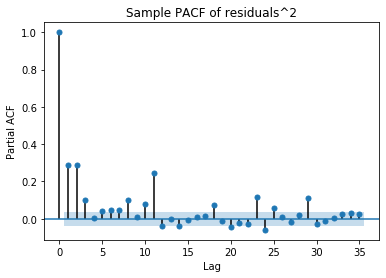

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(arima_fit.resid() ** 2)
plt.xlabel("Lag")
plt.ylabel("Partial ACF")
plt.title("Sample PACF of residuals^2")
plt.show()

In [108]:
from arch import arch_model
from statsmodels.tsa.arima_model import ARIMA

amf = ARIMA(r, order=(0, 0, 1)).fit()
archm = arch_model(amf.resid, p=1, o=0, q=1).fit()
archm.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 3934.6857836334175
Iteration:     10,   Func. Count:     64,   Neg. LLF: 3894.7244584396176
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3894.7244584396176
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -3894.72
Distribution:                  Normal   AIC:                           7797.45
Method:            Maximum Likelihood   BIC:                           7821.18
                                        No. Observations:                 2789
Date:                Tue, Aug 25 2020   Df Residuals:                     2785
Time:                        17:39:47   Df Model:                            4
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0156  1.719e-02      0.910      0.363 [-1.804e-02,4.933e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0328  1.759e-02      1.862  6.253e-02 [-1.715e-03,6.725e-02]
alpha[1]       0.0905  3.212e-02      2.817  4.849e-03    [2.752e-02,  0.153]
beta[1]        0.8820  4.332e-02     20.360  3.752e-92      [  0.797,  0.967]
=============================================================================

Covariance estimator: robust
"""

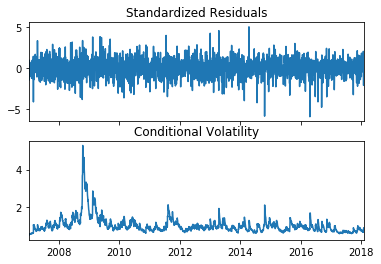

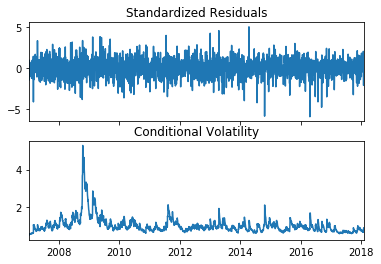

In [80]:
archm.plot()

In [81]:
# Problem 1c.
# Repeat part (b), for a ARMA+GARCH model with student-t residuals

amf_t = ARIMA(r, order=(0, 0, 1)).fit()
archm_t = arch_model(amf.resid, p=1, o=0, q=1, dist='t').fit()
archm_t.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 93079.7266423809
Iteration:      2,   Func. Count:     17,   Neg. LLF: 46016.32329498032
Iteration:      3,   Func. Count:     26,   Neg. LLF: 6680.919591907386
Iteration:      4,   Func. Count:     35,   Neg. LLF: 9193.429567243085
Iteration:      5,   Func. Count:     42,   Neg. LLF: 6204.7962065125585
Iteration:      6,   Func. Count:     49,   Neg. LLF: 4017.297117531335
Iteration:      7,   Func. Count:     56,   Neg. LLF: 3797.375583866704
Iteration:      8,   Func. Count:     63,   Neg. LLF: 6263.333628931876
Iteration:      9,   Func. Count:     70,   Neg. LLF: 3794.4654208472084
Iteration:     10,   Func. Count:     77,   Neg. LLF: 3789.3486349604755
Iteration:     11,   Func. Count:     84,   Neg. LLF: 3788.397580128997
Iteration:     12,   Func. Count:     91,   Neg. LLF: 3788.384550987498
Iteration:     13,   Func. Count:     98,   Neg. LLF: 3788.384323652083
Iteration:     14,   Func. Count:    103,   Neg. LLF: 3788.384

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                         None   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                            GARCH   Log-Likelihood:               -3788.38
Distribution:      Standardized Student's t   AIC:                           7586.77
Method:                  Maximum Likelihood   BIC:                           7616.44
                                              No. Observations:                 2789
Date:                      Tue, Aug 25 2020   Df Residuals:                     2784
Time:                              17:19:43   Df Model:                            5
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0216  1.519e-02      1.425      0.154 [-8.119e-03,5.141e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0149  8.131e-03      1.838  6.608e-02 [-9.926e-04,3.088e-02]
alpha[1]       0.0658  2.089e-02      3.149  1.637e-03    [2.484e-02,  0.107]
beta[1]        0.9243  2.524e-02     36.626 1.094e-293      [  0.875,  0.974]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.9727      0.459     10.827  2.552e-27 [  4.073,  5.873]
========================================================================

Covariance estimator: robust
"""

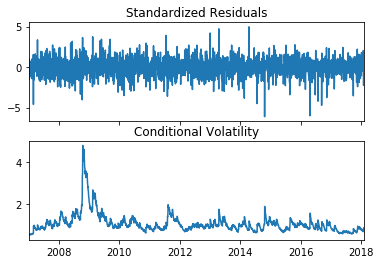

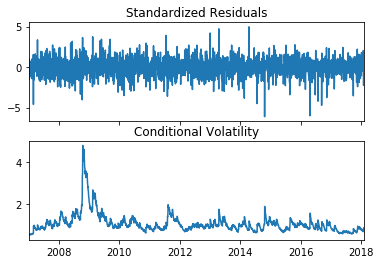

In [82]:
archm_t.plot()

In [133]:
# Problem 1d.
# Obtain 1-step to 5-step ahead forecasts for daily returns using the fitted models i part (b) ad (c).

res = archm.forecast(horizon=5)
res_mean = res.mean.iloc[-1,:]
res_residual_variance = res.residual_variance.iloc[-1,:]
res_variance = res.variance.iloc[-1,:]
res_df = pd.DataFrame({'Mean': res_mean, 'Residual Variance': res_residual_variance, 'Variance': res_variance})

res_df

,Mean,Residual Variance,Variance
h.1,0.015644,0.765881,0.765881
h.2,0.015644,0.777543,0.777543
h.3,0.015644,0.788884,0.788884
h.4,0.015644,0.799912,0.799912
h.5,0.015644,0.810636,0.810636


In [132]:
res_t = archm_t.forecast(horizon=5)
res_t_mean = res_t.mean.iloc[-1,:]
res_t_residual_variance = res_t.residual_variance.iloc[-1,:]
res_t_variance = res_t.variance.iloc[-1,:]
res_t_df = pd.DataFrame({'Mean': res_t_mean, 'Residual Variance': res_t_residual_variance, 'Variance': res_t_variance})

res_t_df

,Mean,Residual Variance,Variance
h.1,0.021644,0.683141,0.683141
h.2,0.021644,0.691316,0.691316
h.3,0.021644,0.699410,0.699410
h.4,0.021644,0.707424,0.707424
h.5,0.021644,0.715359,0.715359
